# Convolutional AE con Keras

https://blog.keras.io/building-autoencoders-in-keras.html

In [1]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

In [2]:
# MODELO

# ENCODER
input_img = Input(shape=(28, 28, 1))  
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# DECODER
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)


In [3]:
opt = Adam(learning_rate=0.0001)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=opt, loss='mse')

In [4]:
# DATOS
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1)) 
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584   

In [6]:
# ENTRENAMIENTO
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
469/469 [==============================] - 16s 15ms/step - loss: 0.1333 - val_loss: 0.0702
Epoch 2/100
469/469 [==============================] - 6s 13ms/step - loss: 0.0572 - val_loss: 0.0492
Epoch 3/100
469/469 [==============================] - 6s 13ms/step - loss: 0.0430 - val_loss: 0.0388
Epoch 4/100
469/469 [==============================] - 6s 13ms/step - loss: 0.0368 - val_loss: 0.0345
Epoch 5/100
469/469 [==============================] - 6s 13ms/step - loss: 0.0333 - val_loss: 0.0316
Epoch 6/100
469/469 [==============================] - 6s 13ms/step - loss: 0.0309 - val_loss: 0.0295
Epoch 7/100
469/469 [==============================] - 6s 14ms/step - loss: 0.0290 - val_loss: 0.0278
Epoch 8/100
469/469 [==============================] - 6s 13ms/step - loss: 0.0275 - val_loss: 0.0265
Epoch 9/100
469/469 [==============================] - 6s 14ms/step - loss: 0.0262 - val_loss: 0.0253
Epoch 10/100
469/469 [==============================] - 6s 14ms/step - loss: 0.02

In [7]:
# TEST
decoded_imgs = autoencoder.predict(x_test)

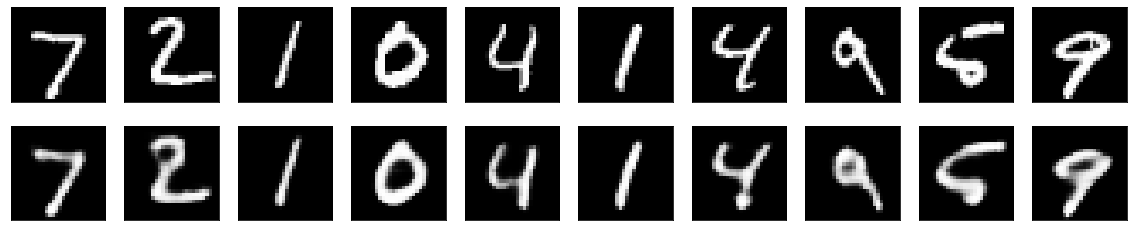

In [8]:
import matplotlib.pyplot as plt

n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruccion
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Limpieza de ruido

In [9]:
# Creamos datos ruidosos
x_test_nois = x_test + 0.3*np.random.randn(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)
decoded_imgs = autoencoder.predict(x_test_nois)

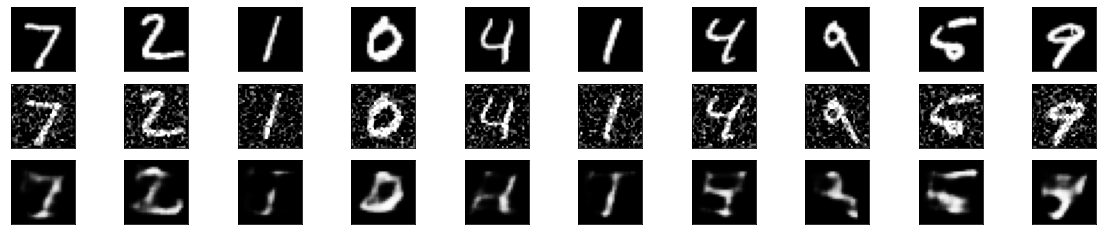

In [22]:
import matplotlib.pyplot as plt

n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    # Originales
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(np.squeeze(x_test[i,:,:]),vmin= 0,vmax=1)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Ruidosos
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_nois[i].reshape(28, 28),vmin= 0,vmax=1)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstruccion
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28),vmin= 0,vmax=1)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Detección de anomalias

## Ejemplo con los datos ruidosos

In [23]:
import numpy as np
# calculamos el error en los datos normales y ruidosos

x_test_nois_pred = autoencoder.predict(x_test_nois)

error_nois = np.mean(np.abs(x_test_nois-x_test_nois_pred)**2,tuple(range(1, x_test_nois.ndim)))


x_test_pred = autoencoder.predict(x_test)

error_tes = np.mean(np.abs(x_test-x_test_pred)**2,tuple(range(1, x_test_pred.ndim)))


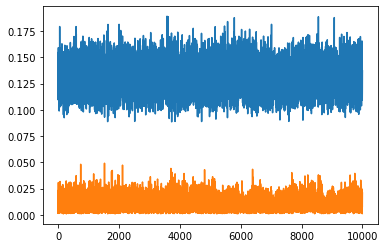

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure
plt.plot(error_nois)
plt.plot(error_tes)


## Ejemplo inventado

In [13]:
import numpy as np

X_test_anom = x_test


#Distintos tipos de anomalias

# Zero
#X_test_anom[1000,:] = np.ones((1,X_test_anom.shape[1]))*0

# Max
#X_test_anom[1000,:] = np.ones((1,X_test_anom.shape[1]))*x_test.max()

# Negativo
#X_test_anom[1000,:] = -X_test_anom[1000,:]

# Multiplicado
X_test_anom[1000,:] = 5*X_test_anom[1000,:]

# Ruido
#X_test_anom[1000,:] = 0.5*np.random.randn(1,X_test_anom.shape[1])

In [14]:

# calculamos el error en los datos reconstruidos

X_test_anom_pred = autoencoder.predict(X_test_anom)

error_tes = np.mean(np.abs(X_test_anom-X_test_anom_pred)**2,axis=tuple(range(1, X_test_anom.ndim)))


In [15]:
error_tes[1000]

1.4385428

In [16]:
error_tes[1]

0.017340798

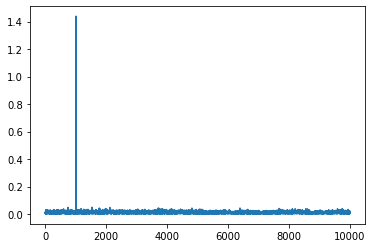

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure
plt.plot(error_tes)
